In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from scipy.stats import ttest_ind,
import warnings
warnings.simplefilter(action= 'ignore', category=FutureWarning)

In [77]:
crypto = pd.read_csv('Cryptocurrency Prices by Date.csv')
crypto.head()

,Currency,Date,Price
0,0x,1502892561000,0.111725
1,0x,1502982305000,0.211486
2,0x,1503068692000,0.283789
3,0x,1503155108000,0.511434
4,0x,1503241503000,0.429522


In [78]:
print(f'The dataset has a shape of {crypto.shape}', '\n')
print(f'The dataset has {crypto.isnull().sum().sum()} missing values' , '\n')
print(f'The dataset has {crypto.duplicated().sum()} duplicated rows' , '\n')

The dataset has a shape of (657316, 3) 

The dataset has 0 missing values 

The dataset has 0 duplicated rows 



In [79]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657316 entries, 0 to 657315
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Currency  657316 non-null  object 
 1   Date      657316 non-null  int64  
 2   Price     657316 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 15.0+ MB


In [80]:
pd.set_option('display.max_rows', None)
#Number of cryptocurrencies
crypto['Currency'].value_counts().sort_values(ascending=False)

namecoin                                1736
litecoin                                1735
bitcoin                                 1733
feathercoin                             1727
novacoin                                1727
peercoin                                1726
terracoin                               1702
bitbar                                  1692
worldcoin                               1686
digitalcoin                             1679
goldcoin                                1661
primecoin                               1661
megacoin                                1654
ripple                                  1633
yacoin                                  1624
anoncoin                                1621
ixcoin                                  1611
infinitecoin                            1610
quark                                   1606
zetacoin                                1594
cryptogenic-bullion                     1591
freicoin                                1584
phoenixcoi

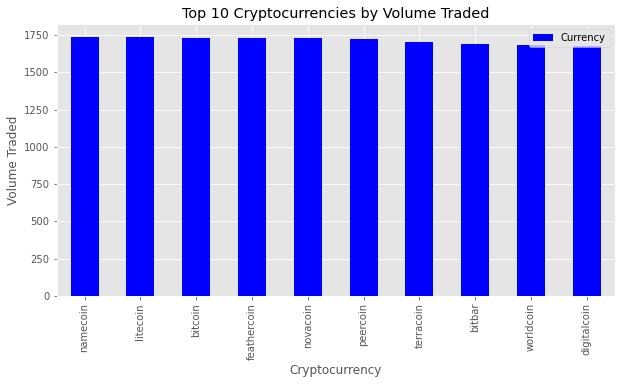

In [81]:
plt.style.use('ggplot')
crypto['Currency'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', color='blue', figsize=(10,5),title='Top 10 Cryptocurrencies by Volume Traded')
plt.legend()
plt.xlabel('Cryptocurrency')
plt.ylabel('Volume Traded')
plt.show();                                                                             

In [82]:
#Date column is written in this format 1502892561000 which is the number of milliseconds since 1 January 1970
#Convert the date column to datetime format
crypto['Date'] = pd.to_datetime(crypto['Date'], unit='ms')
#Obtain the year, month, day and time from the date column
crypto['month'] = crypto['Date'].dt.month
crypto['year'] = crypto['Date'].dt.year
crypto['day'] = crypto['Date'].dt.day
crypto['time'] = crypto['Date'].dt.time

crypto['Date'] = crypto['Date'].apply(lambda x: str(x).split(' ')[0])
crypto.head()

,Currency,Date,Price,month,year,day,time
0,0x,2017-08-16,0.111725,8,2017,16,14:09:21
1,0x,2017-08-17,0.211486,8,2017,17,15:05:05
2,0x,2017-08-18,0.283789,8,2017,18,15:04:52
3,0x,2017-08-19,0.511434,8,2017,19,15:05:08
4,0x,2017-08-20,0.429522,8,2017,20,15:05:03


In [83]:
crypto = crypto[['Currency', 'Date', 'month','year','day','time','Price']]
crypto.head()

,Currency,Date,month,year,day,time,Price
0,0x,2017-08-16,8,2017,16,14:09:21,0.111725
1,0x,2017-08-17,8,2017,17,15:05:05,0.211486
2,0x,2017-08-18,8,2017,18,15:04:52,0.283789
3,0x,2017-08-19,8,2017,19,15:05:08,0.511434
4,0x,2017-08-20,8,2017,20,15:05:03,0.429522


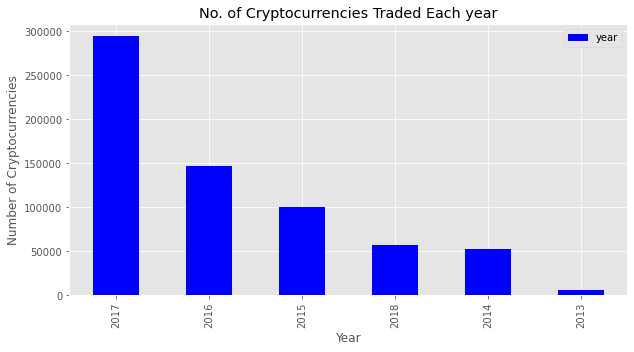

In [84]:
crypto['year'].value_counts().sort_values(ascending=False).plot(kind='bar',color='blue',figsize=(10,5), title='No. of Cryptocurrencies Traded Each year')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Cryptocurrencies')
plt.show();

<AxesSubplot:title={'center':'Top 10 Cryptocurrencies Traded in 2017'}>

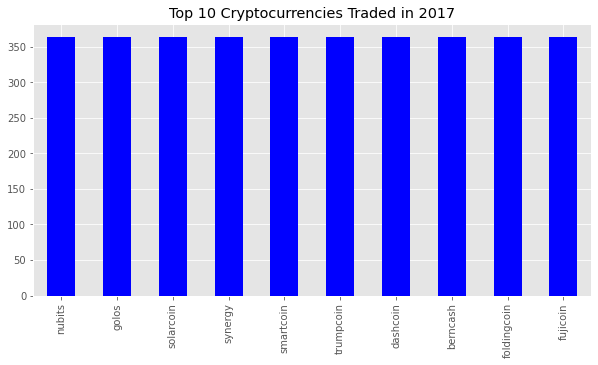

In [85]:
#2017 cryptocurrency trade
crypto[crypto['year'] == 2017]['Currency'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',color='blue',figsize=(10,5),title='Top 10 Cryptocurrencies Traded in 2017')


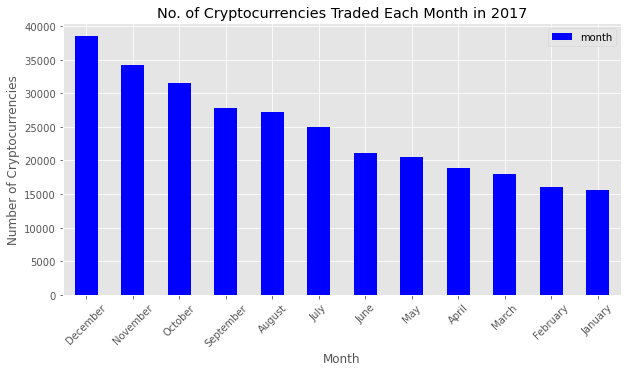

In [86]:
crypto_17 = crypto.query('year == 2017')
#Plot the number of cryptocurrncies traded each month in 2017
crypto_17['month'].value_counts().sort_values(ascending=False).plot(kind='bar',color='blue',figsize=(10,5),title='No. of Cryptocurrencies Traded Each Month in 2017')
plt.legend()
#Replace xticks with month names in reverse order
plt.xticks(np.arange(12), ('December', 'November','October','September','August','July','June','May','April','March','February','January'),rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Cryptocurrencies')
plt.show();

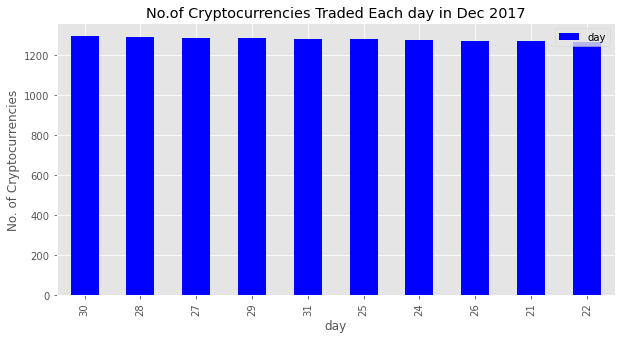

In [87]:
#Which Day in Dec 2017 had the most cryptocurrencies traded?
crypto_17[crypto_17['month'] == 12]['day'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',color='blue',figsize=(10,5),title='No.of Cryptocurrencies Traded Each day in Dec 2017')
plt.legend()
plt.xlabel('day')
plt.ylabel('No. of Cryptocurrencies')
plt.show();
                                                                                  


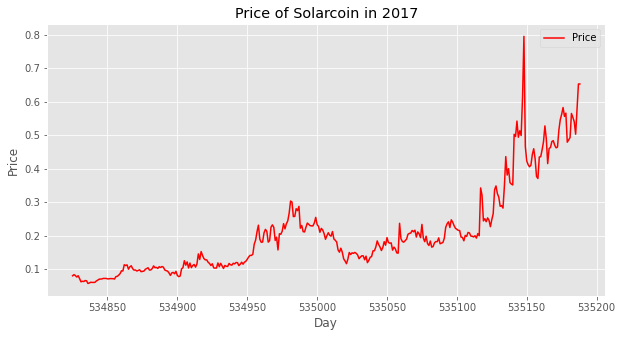

In [88]:
# Price of Solarcoin in 2017
crypto_17[crypto_17['Currency'] == 'solarcoin']['Price'].plot(kind='line', color='r', figsize=(10, 5), title='Price of Solarcoin in 2017')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

<AxesSubplot:title={'center':'Price v Date Total'}, xlabel='Date'>

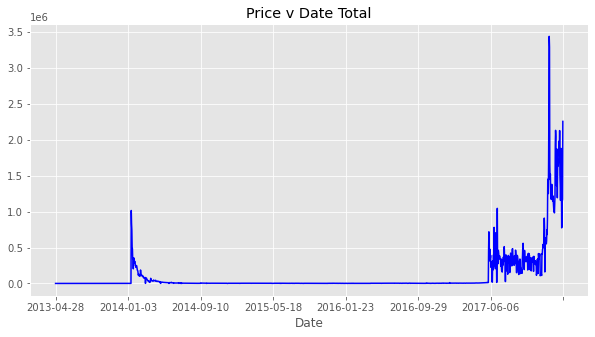

In [89]:
# Price v date total
crypto.groupby('Date')['Price'].sum().plot(kind='line', color='b', figsize=(10, 5), title='Price v Date Total')

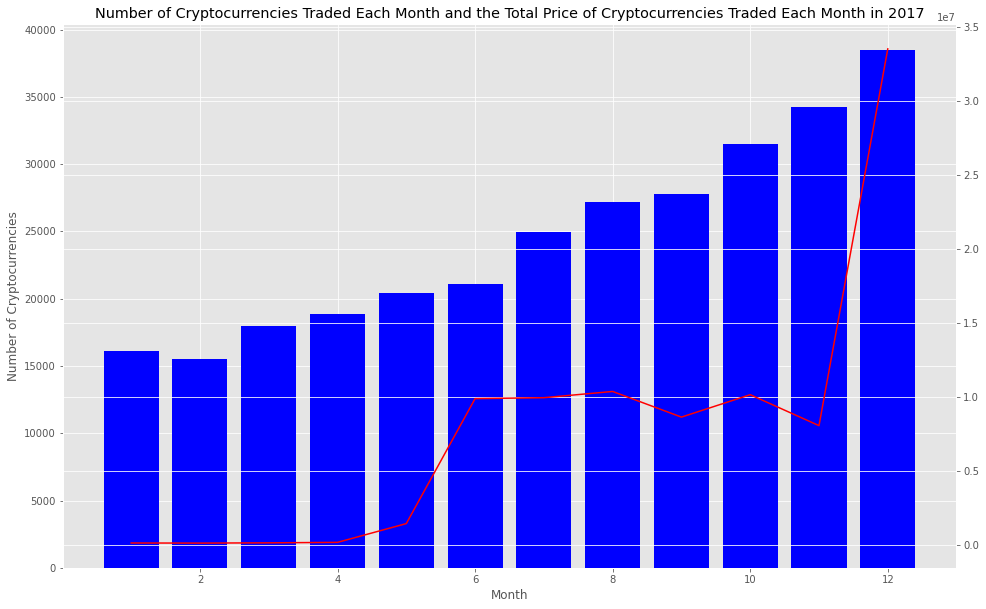

In [90]:
# A combo of a bar and line plot to show the number of cryptocurrencies traded each month in 2017 and the total price of cryptocurrencies traded each month in 2017
fig, ax1 = plt.subplots(figsize=(16, 10))
ax2 = ax1.twinx()
ax1.bar(crypto_17['month'].value_counts().sort_values(ascending=False).index, crypto_17['month'].value_counts().sort_values(ascending=False).values, color='b')
ax2.plot(crypto_17.groupby('month')['Price'].sum(), color='r')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Cryptocurrencies')
ax1.set_xlabel('Month')
#ax2.set_ylabel('Total Price')
plt.title('Number of Cryptocurrencies Traded Each Month and the Total Price of Cryptocurrencies Traded Each Month in 2017');

<AxesSubplot:>

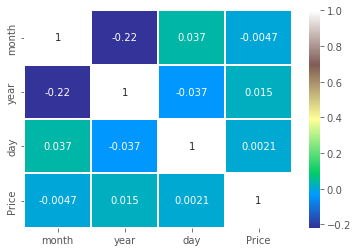

In [91]:
# Plot the correlation heatmap
sns.heatmap(crypto.corr(), annot=True, cmap='terrain', linewidths=0.2)

In [92]:
#Select two specific cryptocurrencies for hypothesis testing
bitcoin_prices = crypto[crypto['Currency'] == 'bitcoin']['Price']
ethereumcoin_prices = crypto[crypto['Currency'] == 'ethereum']['Price'] 

Hypothesis Testing: Bitcoin vs Ethereumcoin
T-Statistic: 13.591758389941736
P-Value: 1.0080870726092734e-40


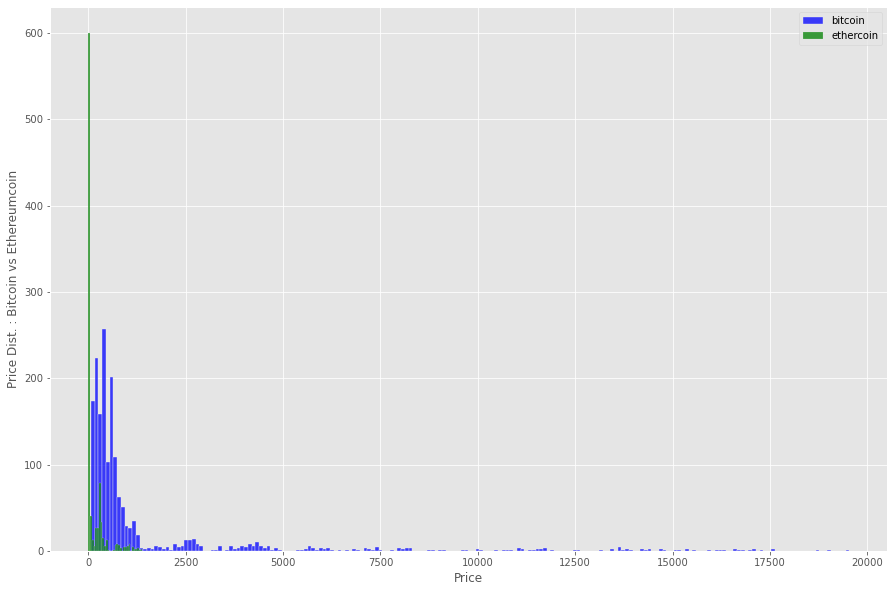

In [93]:
#Perform a t-test to compare the mean prices of Bitcoin and Ethereum
t_stat , p_value = ttest_ind(bitcoin_prices, ethereumcoin_prices)
print('Hypothesis Testing: Bitcoin vs Ethereumcoin')
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

plt.figure(figsize=(15,10))
sns.histplot(bitcoin_prices, color= 'blue', label='bitcoin')
sns.histplot(ethereumcoin_prices, color= 'green', label='ethercoin')
plt.xlabel('Price')
plt.ylabel('Price Dist. : Bitcoin vs Ethereumcoin')
plt.legend()
plt.show()

In [94]:
bitcoin = crypto[crypto['Currency'] == 'bitcoin'].copy()

In [106]:
from numpy.random import choice
from numpy import *
from matplotlib.pyplot import *
import scipy.stats as stats

In [107]:
bitcoin.describe().Price

count     1733.000000
mean      1436.394988
std       2883.248598
min         67.809000
25%        274.517000
50%        480.770000
75%        853.010000
max      19535.700000
Name: Price, dtype: float64

In [108]:
bitprice = bitcoin['Price'].to_numpy()

In [109]:
bitprice

array([ 135.3 ,  141.96,  135.3 , ..., 8179.93, 8003.77, 9037.51])

In [133]:
n_sample = 175
sample= choice(bitprice, n_sample, replace= False)

In [134]:
sample

array([17240.1   ,   240.507 ,   447.122 ,   129.75  ,  4231.63  ,
         674.71  , 11603.1   ,   515.641 ,   253.246 ,   621.996 ,
       16645.5   ,   115.5   ,    78.48  ,  1826.55  ,   628.133 ,
         274.168 ,   381.885 ,   108.9   ,   460.031 ,   573.53  ,
         395.698 ,   443.909 ,   253.204 ,   409.134 ,   395.159 ,
         453.716 ,   229.577 ,   256.82  ,   892.342 ,   151.76  ,
         663.72  ,   395.106 ,   462.06  ,   620.39  ,   121.9   ,
         445.702 ,   236.16  ,   726.507 ,   414.271 ,   909.04  ,
         274.705 ,  7224.09  ,  2635.36  ,   907.185 ,  3896.09  ,
         621.94  , 10877.2   ,   229.296 ,   403.934 ,   419.152 ,
         605.681 ,   192.69  ,   246.765 ,   574.777 ,  4171.88  ,
         113.    ,   224.567 ,   110.55  ,   573.089 ,   629.067 ,
        4490.29  ,   224.947 ,   284.676 ,   693.91  ,   576.673 ,
        4040.3   ,   265.758 ,   253.043 ,  1005.66  ,  2808.39  ,
         667.684 ,   725.873 ,   673.016 ,   231.139 , 11920.4

In [135]:
def collect_sample(data, n_sample, n_choice):
    avgs = zeros(n_choice)
    for i in range(n_choice):
        sample = choice(data, n_sample, replace=False)
        avgs[i] = mean(sample)
    return avgs

In [136]:
avgs = collect_sample(bitprice, n_sample,200)

In [137]:
avgs

array([1358.55521314, 1443.62126229, 1478.31079371, 1090.92077143,
       1444.11663371, 1509.13787486, 1443.64467771, 1367.31038   ,
       1290.17518857, 1654.34619429, 1418.41594286, 1313.39881371,
       1497.52373771, 1379.76678   , 1596.51143943, 1717.94404   ,
       1534.564692  , 1507.08325771, 1192.16672   , 1179.14968514,
       1160.66821257, 1685.65426514, 1481.63126286, 1453.86601543,
       1109.37209429, 1370.34823429, 1751.244668  ,  999.32979371,
       1730.73229714, 1185.600536  , 1418.29750229, 1444.65181086,
       1689.70170171, 1424.50075543, 1566.63867486, 1524.07306914,
       1358.42778686, 1356.74080114, 1361.92349143, 1960.7046    ,
       1129.99312   , 1217.58689143, 1333.58989657, 1803.91860971,
       1844.86794857, 1113.40283543, 1740.56267143, 1274.24450971,
       1835.73814857, 1467.04921657, 1809.96508629, 1350.45532286,
       1424.00616   , 1461.00459943, 1446.21941371, 1186.62034857,
       1226.62935086, 1210.232224  , 1266.71685143, 1553.35193

(array([ 4.,  5.,  8.,  9., 10.,  9., 17., 19., 17., 26., 12., 16.,  7.,
        11.,  9.,  7.,  5.,  5.,  2.,  2.]),
 array([ 994.01339714, 1043.22589117, 1092.4383852 , 1141.65087923,
        1190.86337326, 1240.07586729, 1289.28836131, 1338.50085534,
        1387.71334937, 1436.9258434 , 1486.13833743, 1535.35083146,
        1584.56332549, 1633.77581951, 1682.98831354, 1732.20080757,
        1781.4133016 , 1830.62579563, 1879.83828966, 1929.05078369,
        1978.26327771]),
 <BarContainer object of 20 artists>)

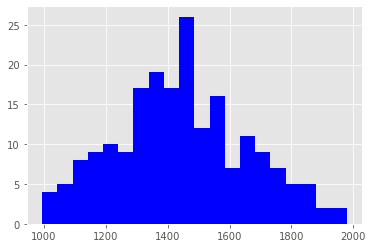

In [138]:
hist(avgs, bins=20,color='b')